In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# 한글 폰트 깨지는 문제 해결
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

### 오전 8시 904번 대여소 -> 903번 대여소 대여 이력 분석 (2022)

In [71]:
# 3. 따릉이 대여이력 정보 데이터(수정 후) 읽어오기 
df3 = pd.read_excel('data/3/서울특별시 공공자전거 대여이력 정보_22_수정.xlsx')
# 6. 일별 대여량 데이터 읽어오기
df_day = pd.read_excel('data/은평뉴타운 1지구 일별 대여량.xlsx')

# 오전 8시에 904번 대여소에서 903번 대여소로 이동한 대여 이력만 추출
tmp = df3[(df3['대여 대여소번호'] == 904) & (df3['반납대여소번호'] == 903) & (df3['대여일시'].apply(lambda x: x[11:13]) == '08')].sort_values(by='대여일시')
# 일별 대여량 데이터셋과 조인하기 위한 대여일 컬럼 생성
tmp['대여일'] = tmp['대여일시'].apply(lambda x: x[0:10])
# 8시 중에서도 어떤 시간대에 주로 대여했는지 파악하기 위해 대여가 일어난 분을 컬럼으로 생성
tmp['대여분'] = tmp['대여일시'].apply(lambda x: x[14:16])
# 어떤 달에 대여량이 많았는지 파악하기 위한 컬럼 생성
tmp['대여월'] = tmp['대여일시'].apply(lambda x: x[5:7])

# 일별 대여량 데이터에서 필요한 공휴일 컬럼만 선택
df_day = df_day[['대여일', 'red']]
# 두 데이터셋을 조인
tmpday= pd.merge(tmp, df_day, how='inner', on='대여일')
tmpday

,대여일시,대여 대여소번호,대여 대여소명,반납일시,반납대여소번호,반납대여소명,대여일,대여분,대여월,red
0,2022-01-04 08:42:15,904,은평뉴타운 푸르지오,2022-01-04 08:45:31,903,은평뉴타운 아이파크,2022-01-04,42,01,0
1,2022-01-05 08:39:34,904,은평뉴타운 푸르지오,2022-01-05 08:42:09,903,은평뉴타운 아이파크,2022-01-05,39,01,0
2,2022-01-07 08:46:47,904,은평뉴타운 푸르지오,2022-01-07 08:50:17,903,은평뉴타운 아이파크,2022-01-07,46,01,0
3,2022-01-10 08:36:11,904,은평뉴타운 푸르지오,2022-01-10 08:38:40,903,은평뉴타운 아이파크,2022-01-10,36,01,0
4,2022-01-12 08:31:52,904,은평뉴타운 푸르지오,2022-01-12 08:35:01,903,은평뉴타운 아이파크,2022-01-12,31,01,0
...,...,...,...,...,...,...,...,...,...,...
225,2022-12-14 08:21:27,904,은평뉴타운 푸르지오,2022-12-14 08:24:31,903,은평뉴타운 아이파크,2022-12-14,21,12,0
226,2022-12-23 08:19:43,904,은평뉴타운 푸르지오,2022-12-23 08:22:34,903,은평뉴타운 아이파크,2022-12-23,19,12,0
227,2022-12-23 08:24:41,904,은평뉴타운 푸르지오,2022-12-23 08:28:06,903,은평뉴타운 아이파크,2022-12-23,24,12,0
228,2022-12-24 08:39:36,904,은평뉴타운 푸르지오,2022-12-24 08:43:35,903,은평뉴타운 아이파크,2022-12-24,39,12,1


#### 분에 따른 대여량 나타내는 라인 그래프 그리기

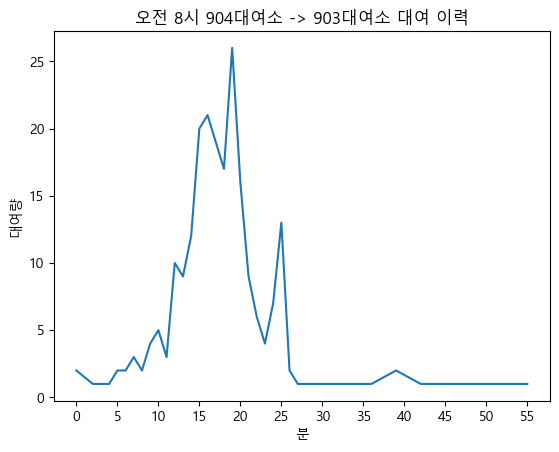

In [54]:
# 분에 따른 대여량을 나타내기 위해 데이터셋 가공
tmpday2 = tmpday.pivot_table(index='대여분', values='red', aggfunc='count').reset_index()
tmpday2['대여 분'] = tmpday2['대여분'].astype(int)

# 라인 그래프 그리기
sns.lineplot(data=tmpday2, x='대여 분', y='red')
plt.title('오전 8시 904대여소 -> 903대여소 대여 이력')
plt.xlabel('분')
plt.xticks(np.arange(0, 60, 5))
plt.ylabel('대여량')
plt.show()

#### 공휴일 비율 나타내는 바 그래프 그리기

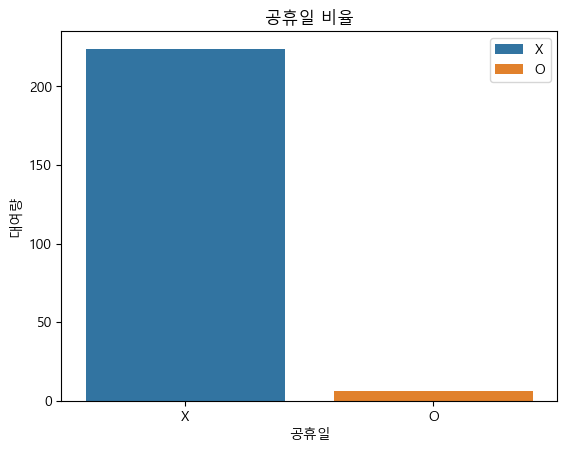

In [70]:
sns.countplot(data=tmpday, x='red', hue='red')
plt.title('공휴일 비율')
plt.xlabel('공휴일')
plt.xticks([0, 1], ['X', 'O'])
plt.ylabel('대여량')
plt.legend(['X', 'O'])
plt.show()

### 942번 대여소 거치 수량 시각화

In [3]:
df2_942 = pd.read_excel('942번 대여소 거치 수량.xlsx')

<Axes: xlabel='None', ylabel='거치대수량'>

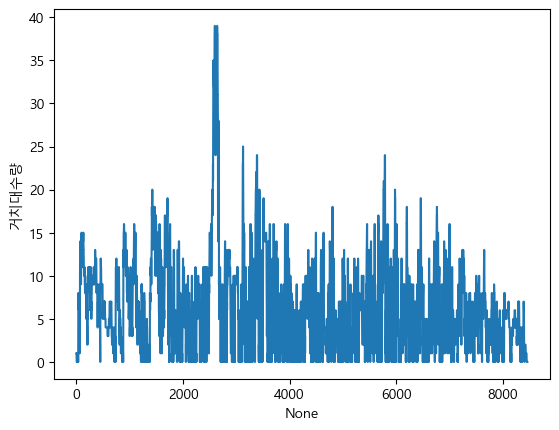

In [6]:
sns.lineplot(data=df2_942, x=df2_942.index, y='거치대수량')

### 가설검정

In [14]:
data = [0.71, 0.52, 0.36, 0.19, 0.19, 0.19, 0.14, 0.11, 0.11, 0.09, 0.08, 0.08, 0.06]

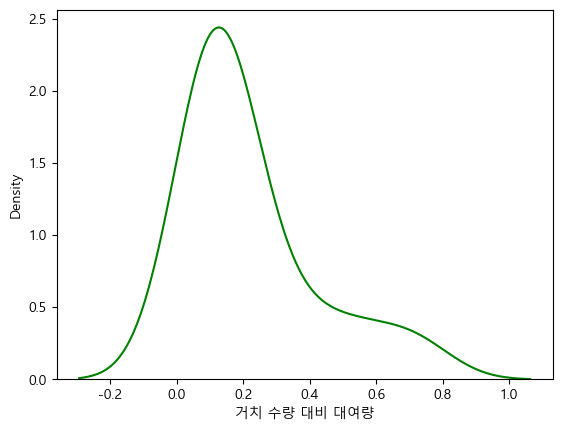

In [5]:
sns.kdeplot(data=data, color='green')
plt.xlabel('거치 수량 대비 대여량')
plt.show()

정규성 검정

In [19]:
stats.normaltest(data)

NormaltestResult(statistic=np.float64(10.16325099575491), pvalue=np.float64(0.006209806779845246))

윌콕슨 순위합 검정

In [21]:
stats.ranksums([0.71, 0.52, 0.36], [0.19, 0.19, 0.19, 0.14, 0.11, 0.11, 0.09, 0.08, 0.08, 0.06])

RanksumsResult(statistic=np.float64(2.53546276418555), pvalue=np.float64(0.011229886652916667))